# House Price Prediction - Comprehensive ML Analysis

## Project Overview
This notebook implements multiple machine learning algorithms to predict house prices:
- **Regression Models**: Simple Linear, Multiple Linear, Polynomial, Ridge, Lasso, ElasticNet
- **Classification Models**: Logistic Regression, Naive Bayes, k-NN, Decision Trees, Random Forest, SVM

## Table of Contents
1. [Data Loading and Exploration](#data-loading)
2. [Exploratory Data Analysis (EDA)](#eda)
3. [Data Preprocessing](#preprocessing)
4. [Model Implementation](#models)
5. [Model Comparison](#comparison)
6. [Model Persistence](#persistence)

## 1. Import Libraries and Load Data

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

# Classification Models
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model persistence
import joblib
import cloudpickle as cp
import pickle

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## 2. Data Loading <a id="data-loading"></a>

In [2]:
# Load the datasets
train_data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')
sample_submission = pd.read_csv('Data/sample_submission.csv')

print("Dataset Information:")
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"Sample submission shape: {sample_submission.shape}")

# Display first few rows
print("\nFirst 5 rows of training data:")
train_data.head()

Dataset Information:
Training data shape: (1460, 81)
Test data shape: (1459, 80)
Sample submission shape: (1459, 2)

First 5 rows of training data:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Basic information about the dataset
print("Training Data Info:")
print(train_data.info())

print("\nTarget Variable (SalePrice) Statistics:")
print(train_data['SalePrice'].describe())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   i

## 3. Exploratory Data Analysis (EDA) <a id="eda"></a>


Training Data Missing Values:
              Missing_Count  Missing_Percentage
PoolQC                 1453           99.520548
MiscFeature            1406           96.301370
Alley                  1369           93.767123
Fence                  1179           80.753425
MasVnrType              872           59.726027
FireplaceQu             690           47.260274
LotFrontage             259           17.739726
GarageType               81            5.547945
GarageYrBlt              81            5.547945
GarageFinish             81            5.547945
GarageQual               81            5.547945
GarageCond               81            5.547945
BsmtFinType2             38            2.602740
BsmtExposure             38            2.602740
BsmtFinType1             37            2.534247
BsmtCond                 37            2.534247
BsmtQual                 37            2.534247
MasVnrArea                8            0.547945
Electrical                1            0.068493


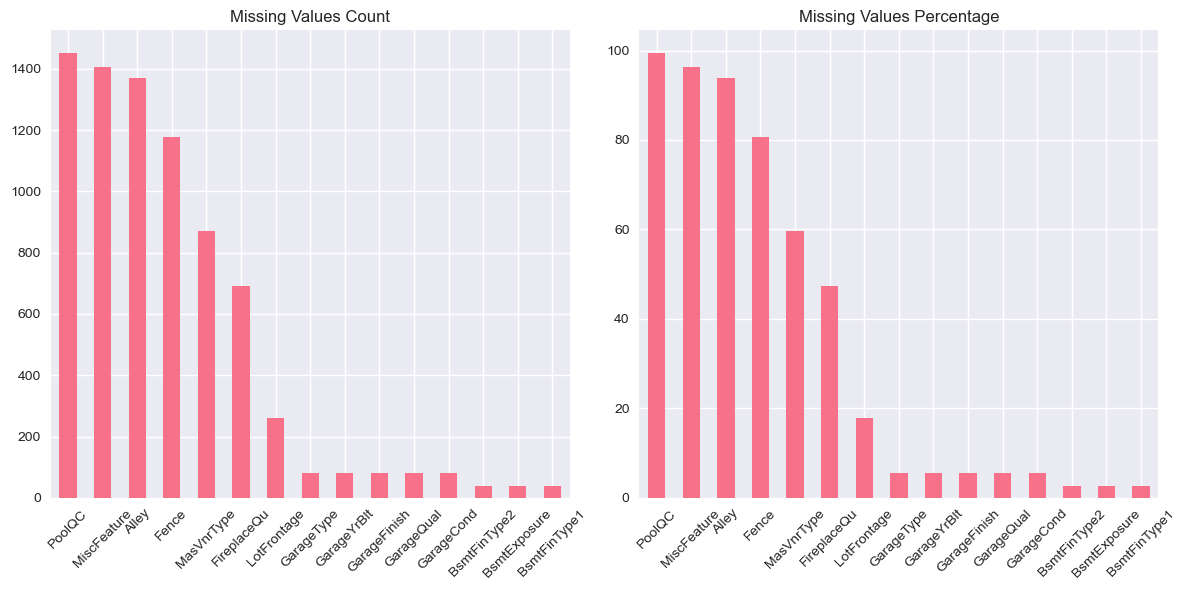

In [4]:
# Check for missing values
def analyze_missing_values(df, title="Missing Values Analysis"):
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Missing_Count': missing_values,
        'Missing_Percentage': missing_percent
    })
    
    missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
    
    if len(missing_df) > 0:
        print(f"\n{title}:")
        print(missing_df.head(20))
        
        # Visualize missing values
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        missing_df.head(15)['Missing_Count'].plot(kind='bar')
        plt.title('Missing Values Count')
        plt.xticks(rotation=45)
        
        plt.subplot(1, 2, 2)
        missing_df.head(15)['Missing_Percentage'].plot(kind='bar')
        plt.title('Missing Values Percentage')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
    else:
        print(f"\n{title}: No missing values found!")
    
    return missing_df

# Analyze missing values in training data
train_missing = analyze_missing_values(train_data, "Training Data Missing Values")

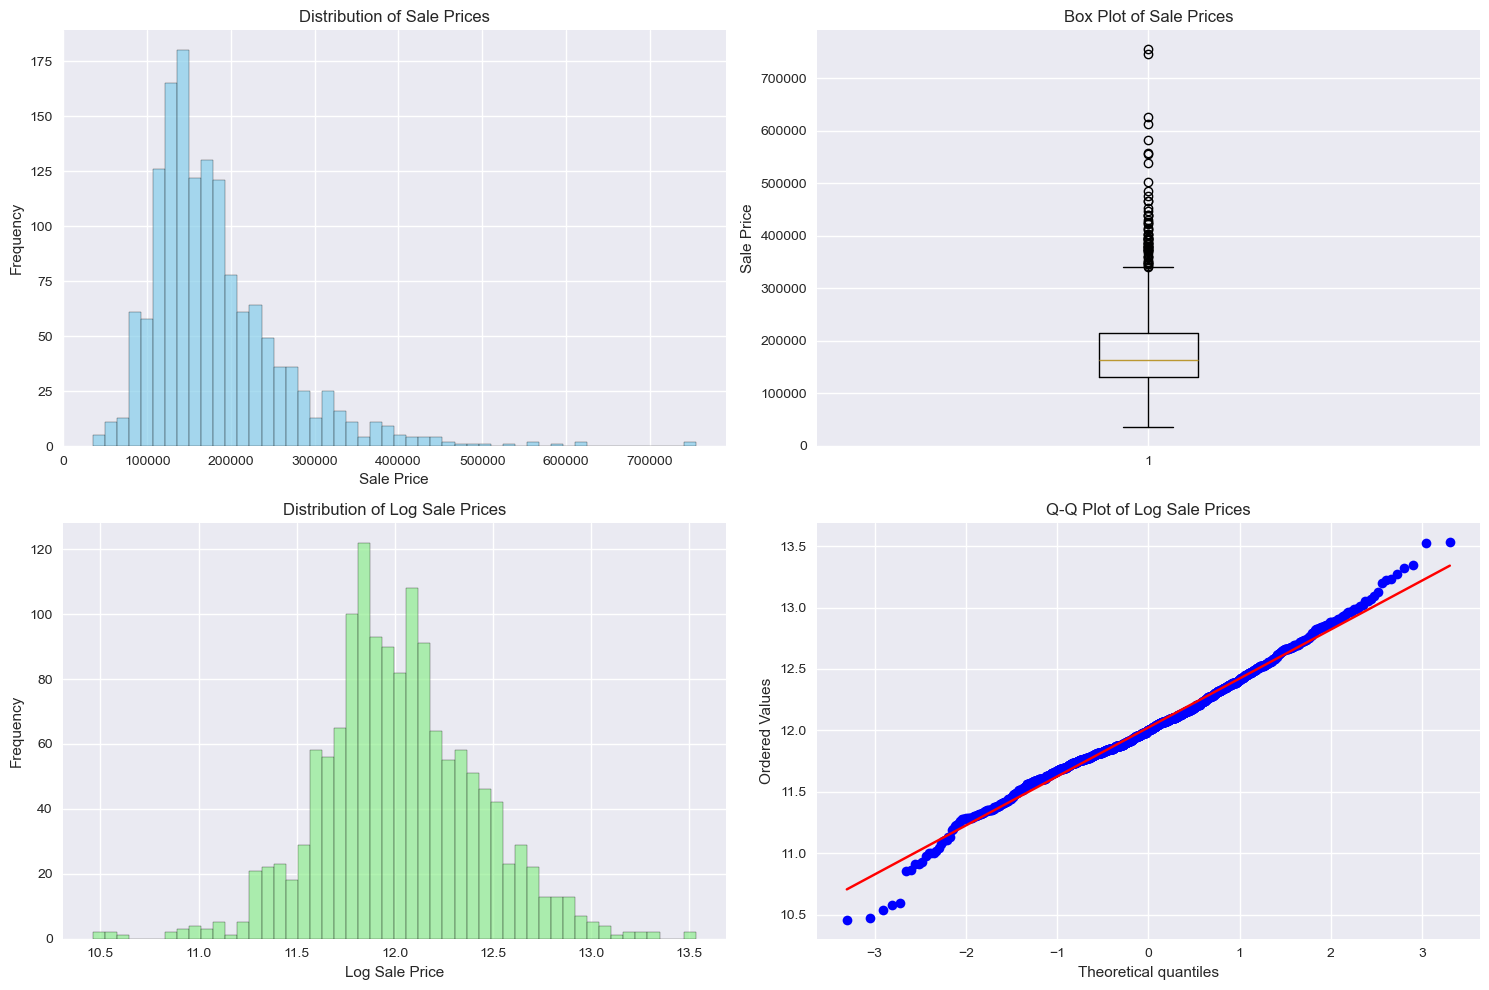


Normality Tests:
Original SalePrice - Shapiro-Wilk p-value: 0.000000
Log SalePrice - Shapiro-Wilk p-value: 0.000000


In [5]:
# Target variable distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axes[0, 0].hist(train_data['SalePrice'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Sale Prices')
axes[0, 0].set_xlabel('Sale Price')
axes[0, 0].set_ylabel('Frequency')

# Box plot
axes[0, 1].boxplot(train_data['SalePrice'])
axes[0, 1].set_title('Box Plot of Sale Prices')
axes[0, 1].set_ylabel('Sale Price')

# Log transformation
log_prices = np.log(train_data['SalePrice'])
axes[1, 0].hist(log_prices, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Distribution of Log Sale Prices')
axes[1, 0].set_xlabel('Log Sale Price')
axes[1, 0].set_ylabel('Frequency')

# Q-Q plot for normality check
from scipy import stats
stats.probplot(log_prices, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Log Sale Prices')

plt.tight_layout()
plt.show()

# Statistical tests for normality
from scipy.stats import shapiro, normaltest
print("\nNormality Tests:")
# Use smaller sample size based on available data
sample_size = min(len(train_data), 5000)
print(f"Original SalePrice - Shapiro-Wilk p-value: {shapiro(train_data['SalePrice'].sample(sample_size))[1]:.6f}")
print(f"Log SalePrice - Shapiro-Wilk p-value: {shapiro(log_prices.sample(sample_size))[1]:.6f}")

In [6]:
# Identify numeric and categorical columns
numeric_features = train_data.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = train_data.select_dtypes(include=[object]).columns.tolist()

# Remove Id and SalePrice from features
if 'Id' in numeric_features:
    numeric_features.remove('Id')
if 'SalePrice' in numeric_features:
    numeric_features.remove('SalePrice')

print(f"Numeric features: {len(numeric_features)}")
print(f"Categorical features: {len(categorical_features)}")
print(f"\nNumeric features: {numeric_features[:10]}...") # Show first 10
print(f"Categorical features: {categorical_features[:10]}...") # Show first 10

Numeric features: 36
Categorical features: 43

Numeric features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2']...
Categorical features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1']...


Top 15 features correlated with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
Name: SalePrice, dtype: float64


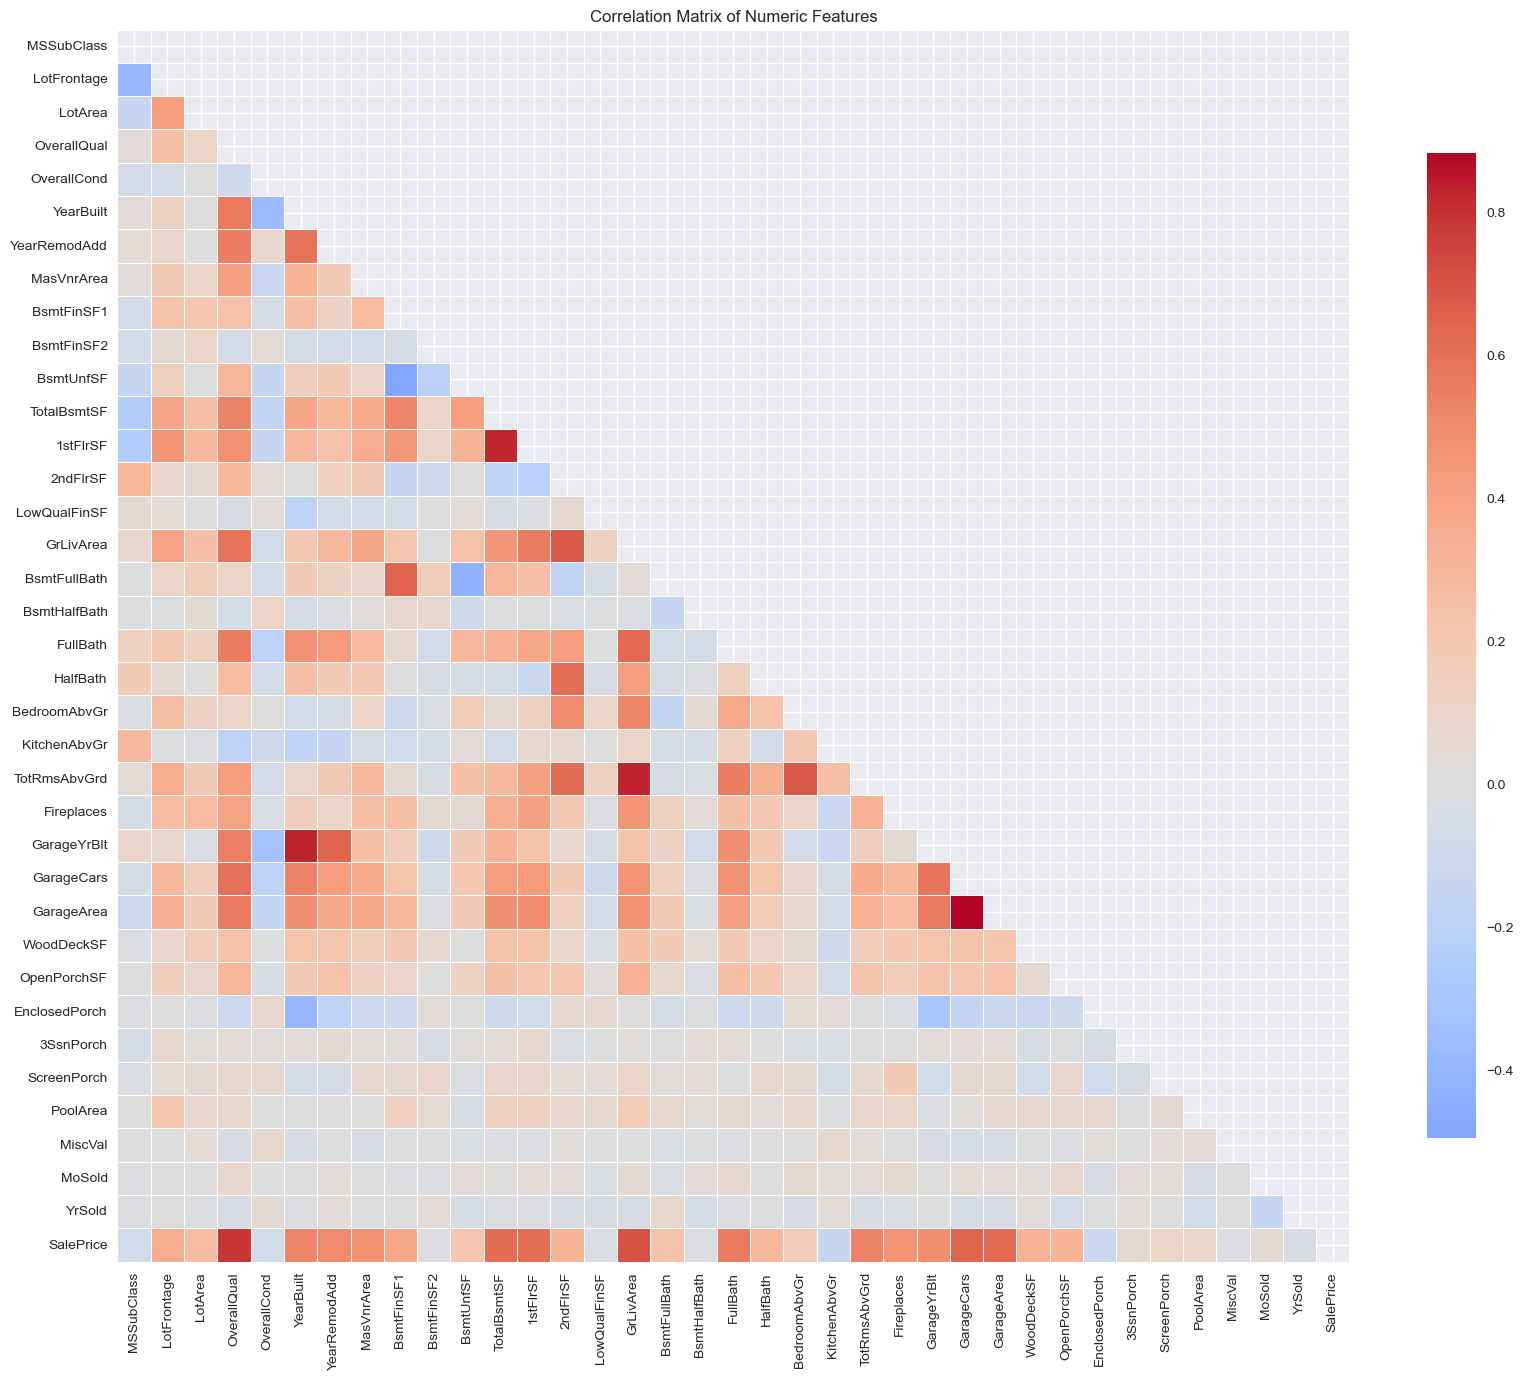

In [7]:
# Correlation analysis for numeric features
numeric_data = train_data[numeric_features + ['SalePrice']]
correlation_matrix = numeric_data.corr()

# Find features most correlated with SalePrice
price_correlations = correlation_matrix['SalePrice'].drop('SalePrice').sort_values(key=abs, ascending=False)
print("Top 15 features correlated with SalePrice:")
print(price_correlations.head(15))

# Create correlation heatmap
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numeric Features')
plt.show()

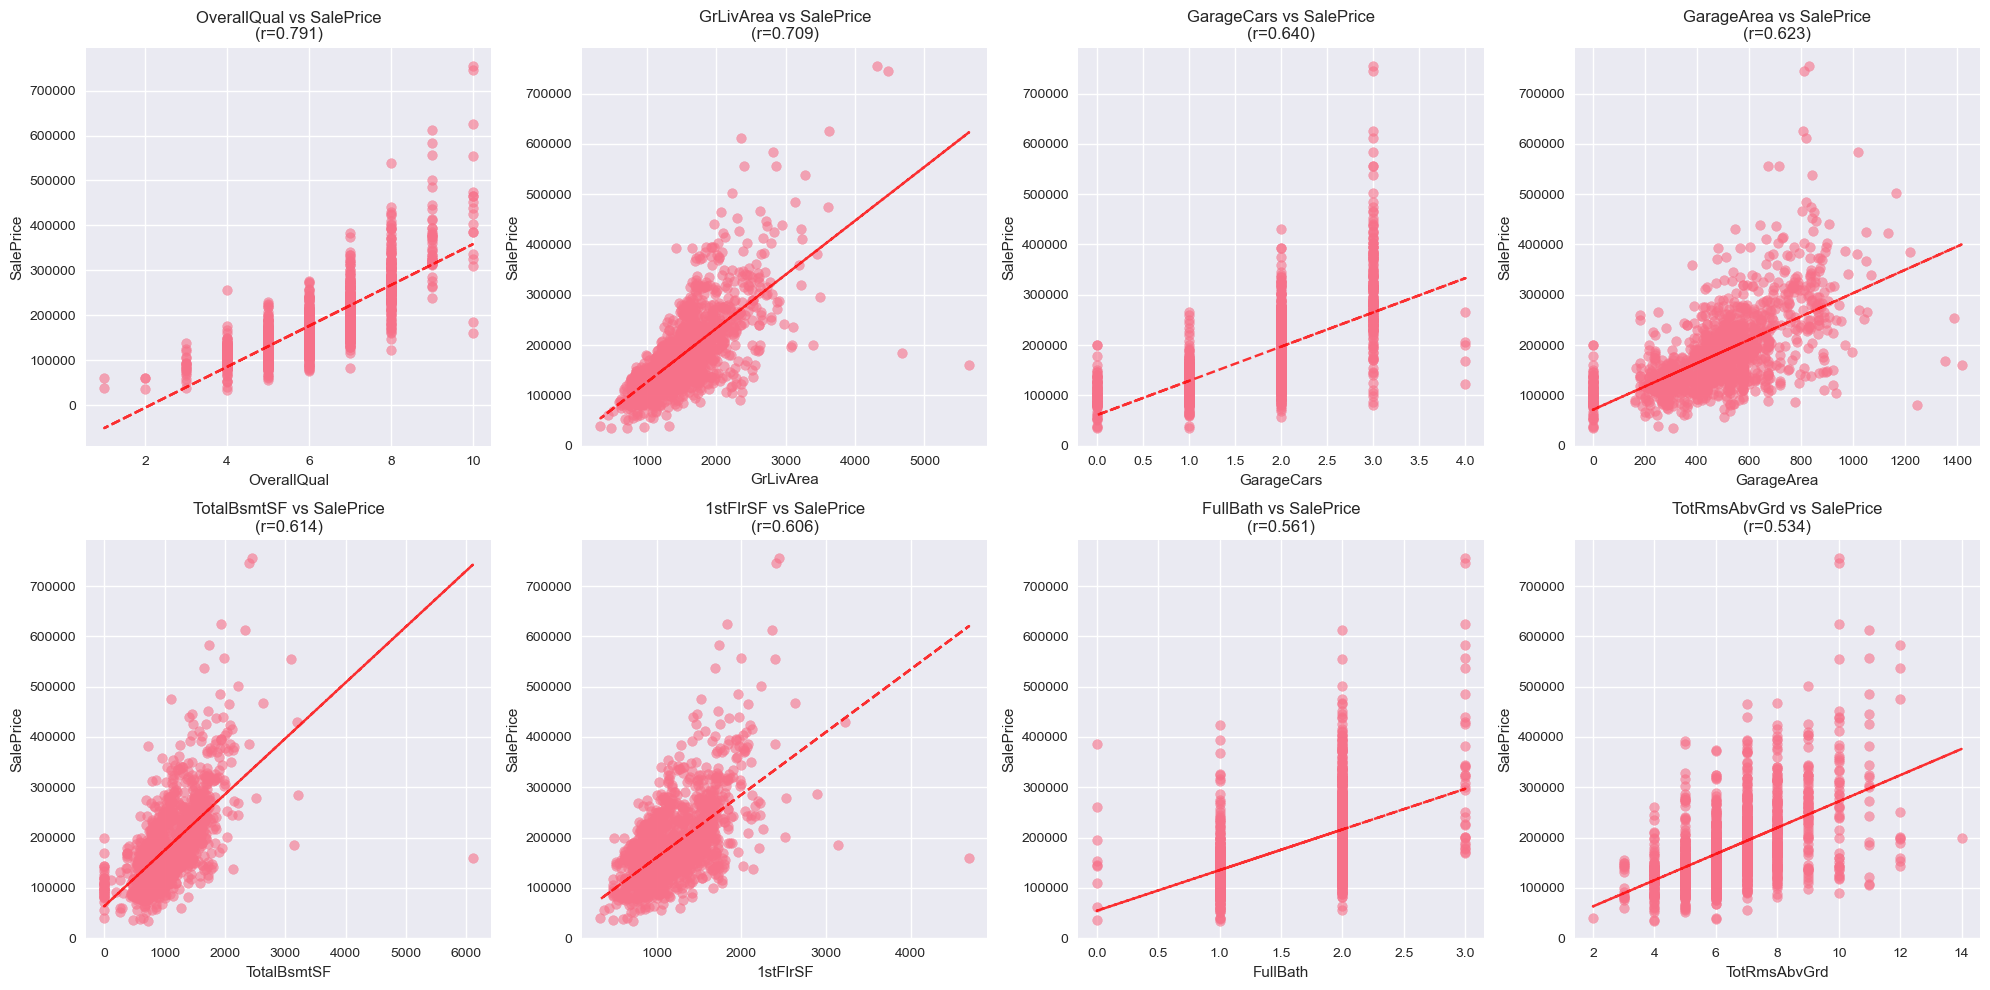

In [8]:
# Analyze top correlated features with SalePrice
top_features = price_correlations.head(8).index.tolist()

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, feature in enumerate(top_features):
    axes[i].scatter(train_data[feature], train_data['SalePrice'], alpha=0.6)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')
    axes[i].set_title(f'{feature} vs SalePrice\n(r={price_correlations[feature]:.3f})')
    
    # Add trend line
    z = np.polyfit(train_data[feature].dropna(), train_data.loc[train_data[feature].dropna().index, 'SalePrice'], 1)
    p = np.poly1d(z)
    axes[i].plot(train_data[feature].dropna(), p(train_data[feature].dropna()), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

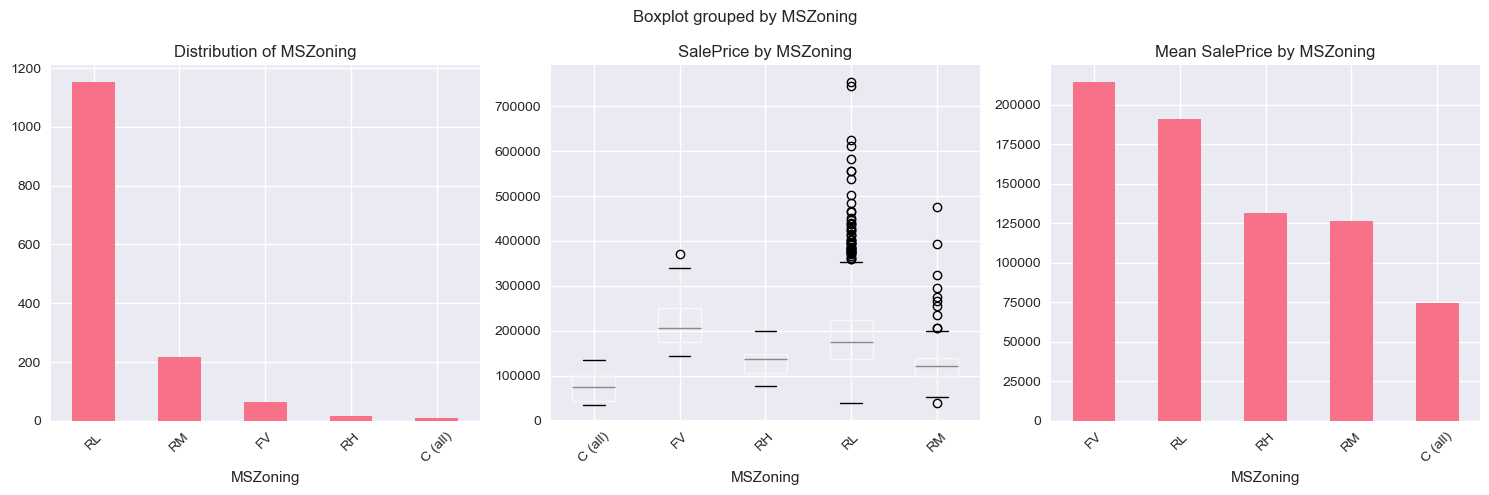


MSZoning - Unique values: 5
Missing values: 0
--------------------------------------------------


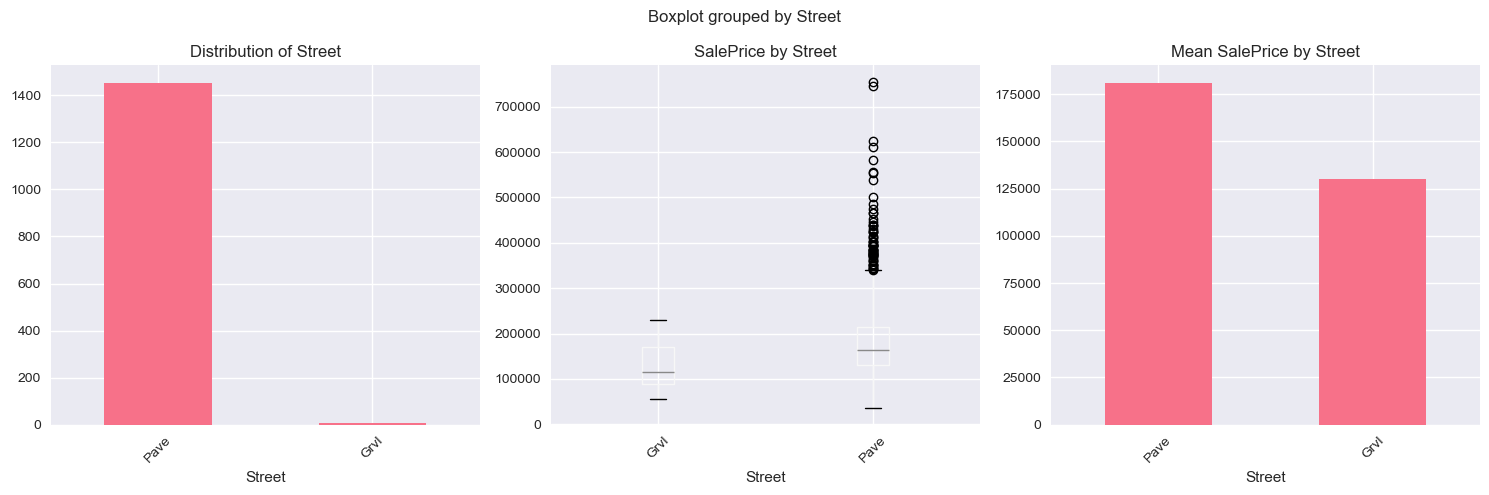


Street - Unique values: 2
Missing values: 0
--------------------------------------------------


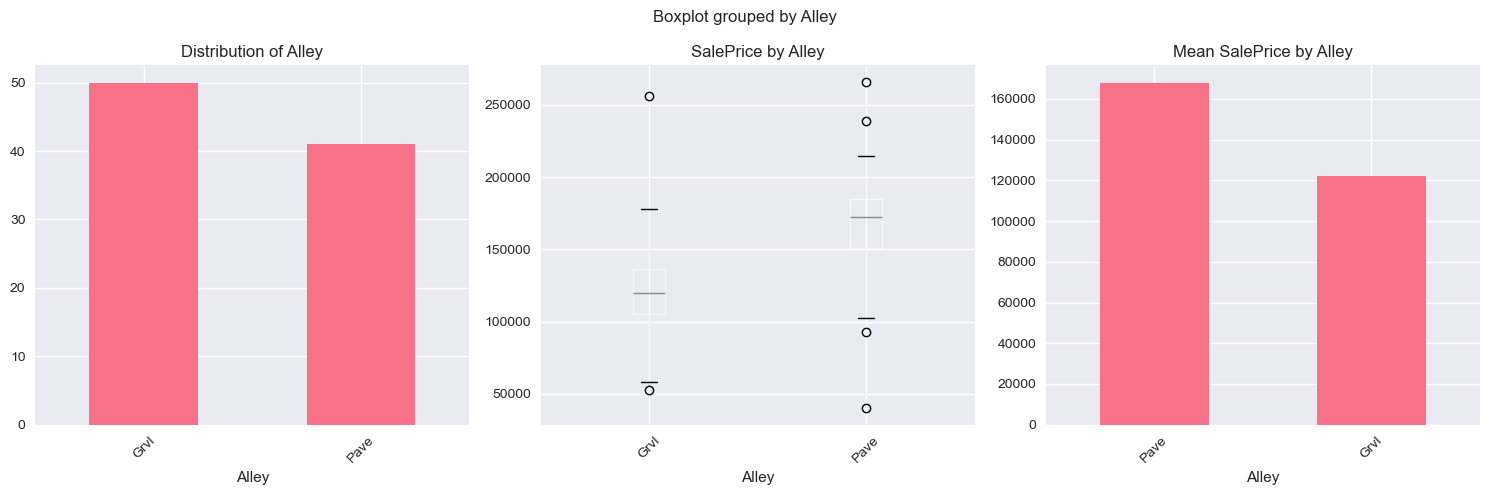


Alley - Unique values: 2
Missing values: 1369
--------------------------------------------------


In [9]:
# Analyze categorical features
def analyze_categorical_features(df, target_col, cat_features, top_n=5):
    """
    Analyze categorical features and their relationship with target variable
    """
    for feature in cat_features[:top_n]:
        plt.figure(figsize=(15, 5))
        
        # Value counts
        plt.subplot(1, 3, 1)
        df[feature].value_counts().head(10).plot(kind='bar')
        plt.title(f'Distribution of {feature}')
        plt.xticks(rotation=45)
        
        # Box plot with target
        plt.subplot(1, 3, 2)
        df.boxplot(column=target_col, by=feature, ax=plt.gca())
        plt.title(f'{target_col} by {feature}')
        plt.xticks(rotation=45)
        
        # Mean target by category
        plt.subplot(1, 3, 3)
        mean_target = df.groupby(feature)[target_col].mean().sort_values(ascending=False).head(10)
        mean_target.plot(kind='bar')
        plt.title(f'Mean {target_col} by {feature}')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        print(f"\n{feature} - Unique values: {df[feature].nunique()}")
        print(f"Missing values: {df[feature].isnull().sum()}")
        print("-" * 50)

# Analyze top categorical features
analyze_categorical_features(train_data, 'SalePrice', categorical_features, top_n=3)

Outlier Analysis:
        Feature  Outlier_Count
4   TotalBsmtSF             61
8     SalePrice             61
1     GrLivArea             31
7  TotRmsAbvGrd             30
3    GarageArea             21
5      1stFlrSF             20
2    GarageCars              5
0   OverallQual              2
6      FullBath              0


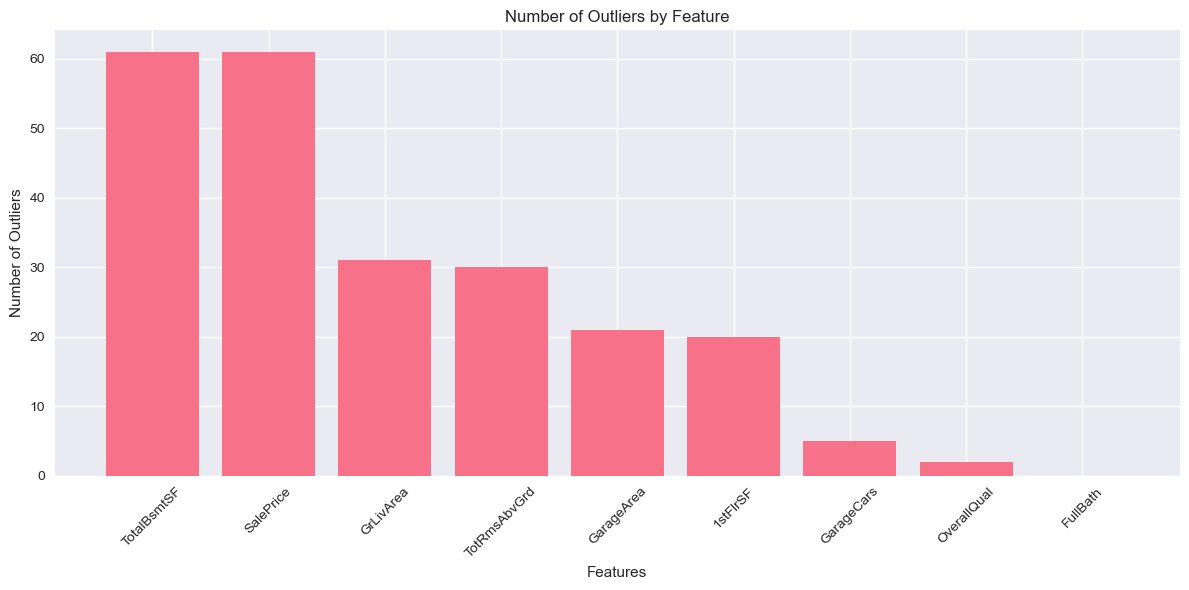

In [10]:
# Outlier detection
def detect_outliers(df, features, method='IQR'):
    """
    Detect outliers using IQR method
    """
    outliers_dict = {}
    
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        outliers_dict[feature] = len(outliers)
    
    return outliers_dict

# Detect outliers in top numeric features
outliers_count = detect_outliers(train_data, top_features + ['SalePrice'])
outliers_df = pd.DataFrame(list(outliers_count.items()), columns=['Feature', 'Outlier_Count'])
outliers_df = outliers_df.sort_values('Outlier_Count', ascending=False)

print("Outlier Analysis:")
print(outliers_df)

# Visualize outliers
plt.figure(figsize=(12, 6))
plt.bar(outliers_df['Feature'], outliers_df['Outlier_Count'])
plt.title('Number of Outliers by Feature')
plt.xlabel('Features')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Data Preprocessing <a id="preprocessing"></a>

In [11]:
# Data preprocessing function
def preprocess_data(train_df, test_df):
    """
    Comprehensive data preprocessing pipeline
    """
    # Combine train and test for consistent preprocessing
    train_len = len(train_df)
    combined_df = pd.concat([train_df, test_df], ignore_index=True)
    
    # Handle missing values
    # Numeric features - fill with median
    numeric_features = combined_df.select_dtypes(include=[np.number]).columns.tolist()
    if 'Id' in numeric_features:
        numeric_features.remove('Id')
    if 'SalePrice' in numeric_features:
        numeric_features.remove('SalePrice')
    
    for feature in numeric_features:
        combined_df[feature].fillna(combined_df[feature].median(), inplace=True)
    
    # Categorical features - fill with mode or 'Unknown'
    categorical_features = combined_df.select_dtypes(include=[object]).columns.tolist()
    
    for feature in categorical_features:
        combined_df[feature].fillna('Unknown', inplace=True)
    
    # Feature engineering
    # Create new features
    combined_df['TotalSF'] = combined_df['1stFlrSF'] + combined_df['2ndFlrSF'] + combined_df['TotalBsmtSF']
    combined_df['HouseAge'] = combined_df['YrSold'] - combined_df['YearBuilt']
    combined_df['RemodAge'] = combined_df['YrSold'] - combined_df['YearRemodAdd']
    combined_df['TotalBathrooms'] = combined_df['BsmtFullBath'] + combined_df['BsmtHalfBath'] + combined_df['FullBath'] + combined_df['HalfBath']
    combined_df['TotalPorchSF'] = combined_df['OpenPorchSF'] + combined_df['EnclosedPorch'] + combined_df['3SsnPorch'] + combined_df['ScreenPorch']
    
    # Encode categorical variables
    label_encoders = {}
    for feature in categorical_features:
        le = LabelEncoder()
        combined_df[feature] = le.fit_transform(combined_df[feature])
        label_encoders[feature] = le
    
    # Split back to train and test
    train_processed = combined_df[:train_len].copy()
    test_processed = combined_df[train_len:].copy()
    
    return train_processed, test_processed, label_encoders

# Apply preprocessing
train_processed, test_processed, encoders = preprocess_data(train_data, test_data)

print("Preprocessing completed!")
print(f"Training data shape: {train_processed.shape}")
print(f"Test data shape: {test_processed.shape}")
print(f"Missing values in train: {train_processed.isnull().sum().sum()}")
print(f"Missing values in test: {test_processed.isnull().sum().sum()}")

Preprocessing completed!
Training data shape: (1460, 86)
Test data shape: (1459, 86)
Missing values in train: 0
Missing values in test: 1459


In [12]:
# Prepare features and target
# Remove Id and SalePrice from features
feature_columns = [col for col in train_processed.columns if col not in ['Id', 'SalePrice']]

X = train_processed[feature_columns]
y = train_processed['SalePrice']

# For classification, create price categories
y_categories = pd.cut(y, bins=3, labels=['Low', 'Medium', 'High'])
y_cat_encoded = LabelEncoder().fit_transform(y_categories)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_cat, X_val_cat, y_train_cat, y_val_cat = train_test_split(X, y_cat_encoded, test_size=0.2, random_state=42)

print(f"Training features shape: {X_train.shape}")
print(f"Validation features shape: {X_val.shape}")
print(f"Target distribution (categories): {np.bincount(y_cat_encoded)}")

Training features shape: (1168, 84)
Validation features shape: (292, 84)
Target distribution (categories): [   8 1302  150]


## 5. Model Implementation <a id="models"></a>

In [13]:
# Initialize results storage
regression_results = {}
classification_results = {}
models_dict = {}

# Scaling for models that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_train_cat_scaled = X_train_scaled.copy()
X_val_cat_scaled = X_val_scaled.copy()

print("Data prepared for model training!")

Data prepared for model training!


### 5.1 Regression Models

In [14]:
# 1. Simple Linear Regression (using one feature)
print("Training Simple Linear Regression...")
simple_lr = LinearRegression()
# Use the most correlated feature
best_feature = price_correlations.index[0]
simple_lr.fit(X_train[[best_feature]], y_train)
y_pred_simple = simple_lr.predict(X_val[[best_feature]])

regression_results['Simple Linear Regression'] = {
    'RMSE': np.sqrt(mean_squared_error(y_val, y_pred_simple)),
    'MAE': mean_absolute_error(y_val, y_pred_simple),
    'R2': r2_score(y_val, y_pred_simple)
}
models_dict['Simple Linear Regression'] = simple_lr

print(f"Simple Linear Regression - R²: {regression_results['Simple Linear Regression']['R2']:.4f}")

Training Simple Linear Regression...
Simple Linear Regression - R²: 0.6505


In [15]:
# 2. Multiple Linear Regression
print("Training Multiple Linear Regression...")
multi_lr = LinearRegression()
multi_lr.fit(X_train, y_train)
y_pred_multi = multi_lr.predict(X_val)

regression_results['Multiple Linear Regression'] = {
    'RMSE': np.sqrt(mean_squared_error(y_val, y_pred_multi)),
    'MAE': mean_absolute_error(y_val, y_pred_multi),
    'R2': r2_score(y_val, y_pred_multi)
}
models_dict['Multiple Linear Regression'] = multi_lr

print(f"Multiple Linear Regression - R²: {regression_results['Multiple Linear Regression']['R2']:.4f}")

Training Multiple Linear Regression...
Multiple Linear Regression - R²: 0.8445


In [16]:
# 3. Polynomial Regression
print("Training Polynomial Regression...")
# Use top 5 features to avoid overfitting
top_5_features = price_correlations.head(5).index.tolist()
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train[top_5_features])
X_val_poly = poly_features.transform(X_val[top_5_features])

poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)
y_pred_poly = poly_lr.predict(X_val_poly)

regression_results['Polynomial Regression'] = {
    'RMSE': np.sqrt(mean_squared_error(y_val, y_pred_poly)),
    'MAE': mean_absolute_error(y_val, y_pred_poly),
    'R2': r2_score(y_val, y_pred_poly)
}
models_dict['Polynomial Regression'] = (poly_lr, poly_features)

print(f"Polynomial Regression - R²: {regression_results['Polynomial Regression']['R2']:.4f}")

Training Polynomial Regression...
Polynomial Regression - R²: 0.8485


In [17]:
# 4. Ridge Regression
print("Training Ridge Regression...")
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_val_scaled)

regression_results['Ridge Regression'] = {
    'RMSE': np.sqrt(mean_squared_error(y_val, y_pred_ridge)),
    'MAE': mean_absolute_error(y_val, y_pred_ridge),
    'R2': r2_score(y_val, y_pred_ridge)
}
models_dict['Ridge Regression'] = (ridge, scaler)

print(f"Ridge Regression - R²: {regression_results['Ridge Regression']['R2']:.4f}")

Training Ridge Regression...
Ridge Regression - R²: 0.8446


In [18]:
# 5. Lasso Regression
print("Training Lasso Regression...")
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_val_scaled)

regression_results['Lasso Regression'] = {
    'RMSE': np.sqrt(mean_squared_error(y_val, y_pred_lasso)),
    'MAE': mean_absolute_error(y_val, y_pred_lasso),
    'R2': r2_score(y_val, y_pred_lasso)
}
models_dict['Lasso Regression'] = (lasso, scaler)

print(f"Lasso Regression - R²: {regression_results['Lasso Regression']['R2']:.4f}")
print(f"Lasso selected {np.sum(lasso.coef_ != 0)} features out of {len(lasso.coef_)}")

Training Lasso Regression...
Lasso Regression - R²: 0.8445
Lasso selected 83 features out of 84


In [19]:
# 6. ElasticNet Regression
print("Training ElasticNet Regression...")
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(X_train_scaled, y_train)
y_pred_elastic = elastic_net.predict(X_val_scaled)

regression_results['ElasticNet Regression'] = {
    'RMSE': np.sqrt(mean_squared_error(y_val, y_pred_elastic)),
    'MAE': mean_absolute_error(y_val, y_pred_elastic),
    'R2': r2_score(y_val, y_pred_elastic)
}
models_dict['ElasticNet Regression'] = (elastic_net, scaler)

print(f"ElasticNet Regression - R²: {regression_results['ElasticNet Regression']['R2']:.4f}")

Training ElasticNet Regression...
ElasticNet Regression - R²: 0.8414


### 5.2 Classification Models

In [20]:
# 1. Logistic Regression
print("Training Logistic Regression...")
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_cat_scaled, y_train_cat)
y_pred_log = log_reg.predict(X_val_cat_scaled)

classification_results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_val_cat, y_pred_log),
    'Report': classification_report(y_val_cat, y_pred_log)
}
models_dict['Logistic Regression'] = (log_reg, scaler)

print(f"Logistic Regression - Accuracy: {classification_results['Logistic Regression']['Accuracy']:.4f}")

Training Logistic Regression...
Logistic Regression - Accuracy: 0.9247


In [21]:
# 2. Naive Bayes
print("Training Naive Bayes...")
nb = GaussianNB()
nb.fit(X_train_cat_scaled, y_train_cat)
y_pred_nb = nb.predict(X_val_cat_scaled)

classification_results['Naive Bayes'] = {
    'Accuracy': accuracy_score(y_val_cat, y_pred_nb),
    'Report': classification_report(y_val_cat, y_pred_nb)
}
models_dict['Naive Bayes'] = (nb, scaler)

print(f"Naive Bayes - Accuracy: {classification_results['Naive Bayes']['Accuracy']:.4f}")

Training Naive Bayes...
Naive Bayes - Accuracy: 0.4897


In [22]:
# 3. k-Nearest Neighbors
print("Training k-Nearest Neighbors...")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_cat_scaled, y_train_cat)
y_pred_knn = knn.predict(X_val_cat_scaled)

classification_results['k-Nearest Neighbors'] = {
    'Accuracy': accuracy_score(y_val_cat, y_pred_knn),
    'Report': classification_report(y_val_cat, y_pred_knn)
}
models_dict['k-Nearest Neighbors'] = (knn, scaler)

print(f"k-Nearest Neighbors - Accuracy: {classification_results['k-Nearest Neighbors']['Accuracy']:.4f}")

Training k-Nearest Neighbors...
k-Nearest Neighbors - Accuracy: 0.9281


In [23]:
# 4. Decision Trees
print("Training Decision Trees...")
dt = DecisionTreeClassifier(random_state=42, max_depth=10)
dt.fit(X_train_cat, y_train_cat)
y_pred_dt = dt.predict(X_val_cat)

classification_results['Decision Trees'] = {
    'Accuracy': accuracy_score(y_val_cat, y_pred_dt),
    'Report': classification_report(y_val_cat, y_pred_dt)
}
models_dict['Decision Trees'] = dt

print(f"Decision Trees - Accuracy: {classification_results['Decision Trees']['Accuracy']:.4f}")

Training Decision Trees...
Decision Trees - Accuracy: 0.9281


In [24]:
# 5. Random Forest
print("Training Random Forest...")
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf.fit(X_train_cat, y_train_cat)
y_pred_rf = rf.predict(X_val_cat)

classification_results['Random Forest'] = {
    'Accuracy': accuracy_score(y_val_cat, y_pred_rf),
    'Report': classification_report(y_val_cat, y_pred_rf)
}
models_dict['Random Forest'] = rf

print(f"Random Forest - Accuracy: {classification_results['Random Forest']['Accuracy']:.4f}")

Training Random Forest...
Random Forest - Accuracy: 0.9623


In [25]:
# 6. Support Vector Machines
print("Training Support Vector Machines...")
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_cat_scaled, y_train_cat)
y_pred_svm = svm.predict(X_val_cat_scaled)

classification_results['Support Vector Machines'] = {
    'Accuracy': accuracy_score(y_val_cat, y_pred_svm),
    'Report': classification_report(y_val_cat, y_pred_svm)
}
models_dict['Support Vector Machines'] = (svm, scaler)

print(f"Support Vector Machines - Accuracy: {classification_results['Support Vector Machines']['Accuracy']:.4f}")

Training Support Vector Machines...
Support Vector Machines - Accuracy: 0.9486


## 6. Model Comparison and Results <a id="comparison"></a>

In [26]:
# Create results comparison DataFrames
regression_df = pd.DataFrame(regression_results).T
regression_df = regression_df.sort_values('R2', ascending=False)

classification_accuracies = {model: results['Accuracy'] for model, results in classification_results.items()}
classification_df = pd.DataFrame(list(classification_accuracies.items()), columns=['Model', 'Accuracy'])
classification_df = classification_df.sort_values('Accuracy', ascending=False)

print("=" * 60)
print("REGRESSION MODELS COMPARISON")
print("=" * 60)
print(regression_df)

print("\n" + "=" * 60)
print("CLASSIFICATION MODELS COMPARISON")
print("=" * 60)
print(classification_df)

REGRESSION MODELS COMPARISON
                                    RMSE           MAE        R2
Polynomial Regression       34089.684197  22258.835078  0.848493
Ridge Regression            34523.818151  21535.440404  0.844610
Lasso Regression            34537.759152  21546.095056  0.844484
Multiple Linear Regression  34539.734729  21549.375482  0.844466
ElasticNet Regression       34877.896480  20314.627753  0.841406
Simple Linear Regression    51778.626512  33343.242087  0.650468

CLASSIFICATION MODELS COMPARISON
                     Model  Accuracy
4            Random Forest  0.962329
5  Support Vector Machines  0.948630
2      k-Nearest Neighbors  0.928082
3           Decision Trees  0.928082
0      Logistic Regression  0.924658
1              Naive Bayes  0.489726


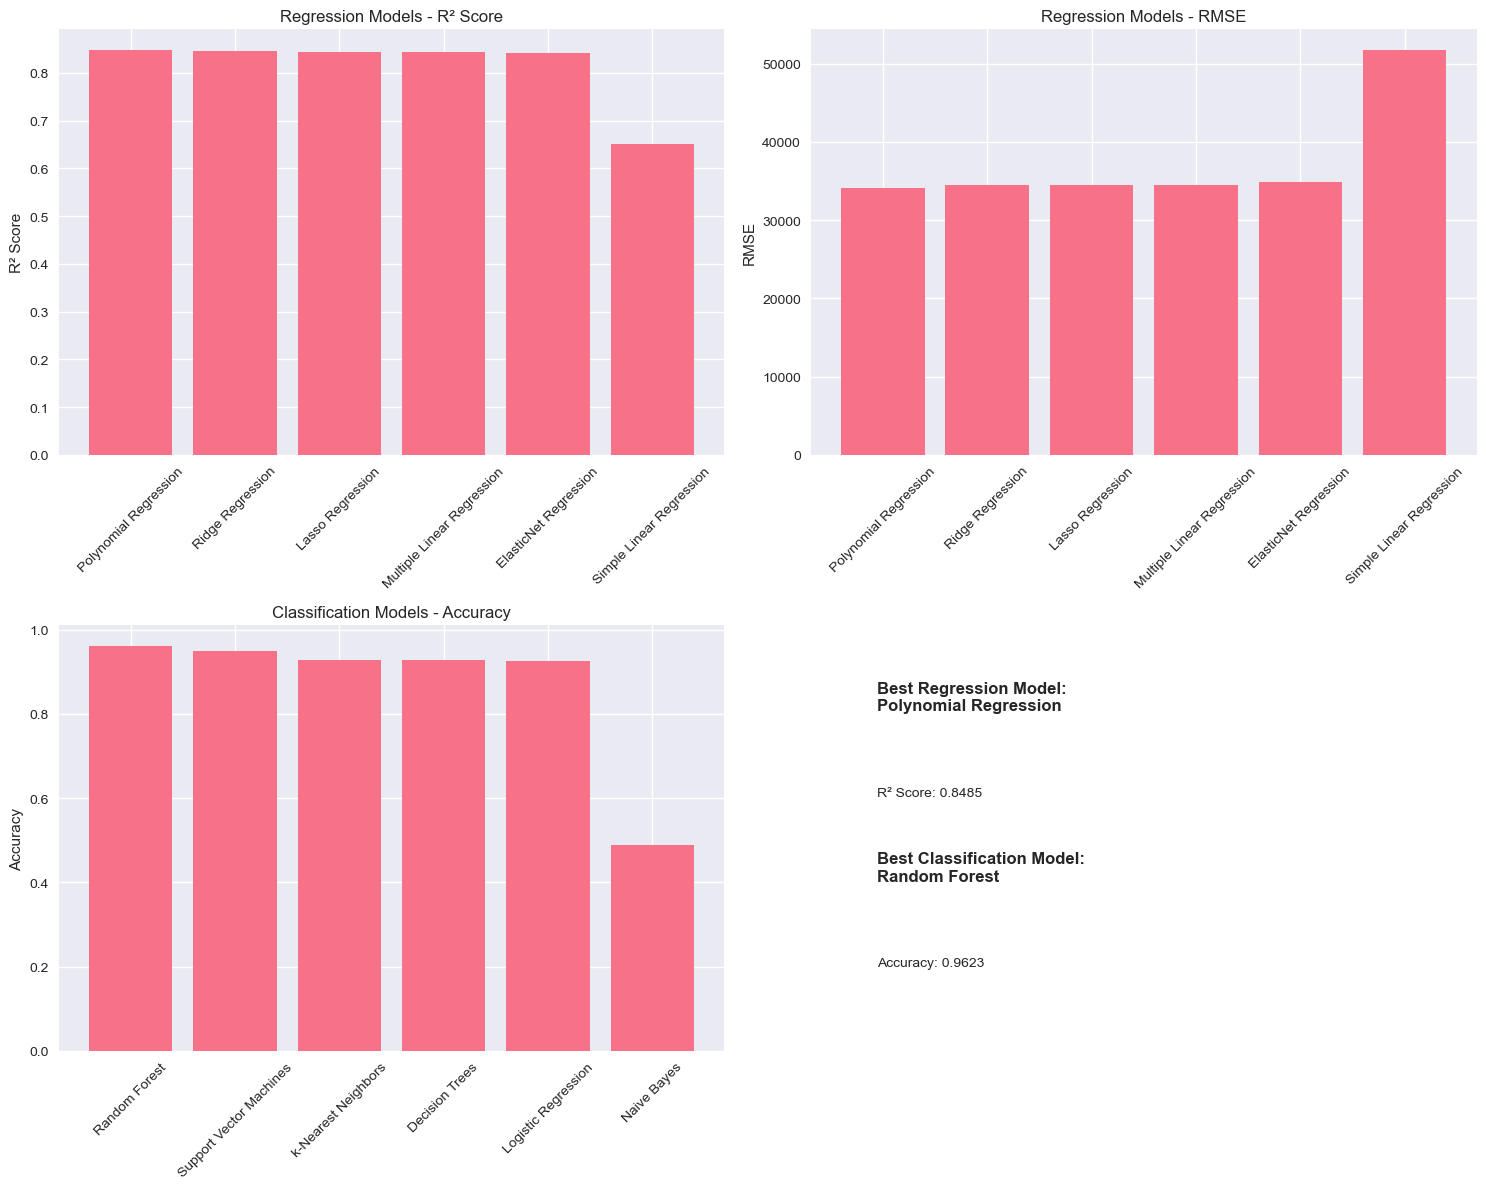

In [27]:
# Visualize model performance
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Regression R² scores
axes[0, 0].bar(regression_df.index, regression_df['R2'])
axes[0, 0].set_title('Regression Models - R² Score')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].tick_params(axis='x', rotation=45)

# Regression RMSE
axes[0, 1].bar(regression_df.index, regression_df['RMSE'])
axes[0, 1].set_title('Regression Models - RMSE')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].tick_params(axis='x', rotation=45)

# Classification Accuracy
axes[1, 0].bar(classification_df['Model'], classification_df['Accuracy'])
axes[1, 0].set_title('Classification Models - Accuracy')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].tick_params(axis='x', rotation=45)

# Model comparison overview
axes[1, 1].axis('off')
best_regression = regression_df.index[0]
best_classification = classification_df.iloc[0]['Model']
axes[1, 1].text(0.1, 0.8, f'Best Regression Model:\n{best_regression}', fontsize=12, weight='bold')
axes[1, 1].text(0.1, 0.6, f'R² Score: {regression_df.loc[best_regression, "R2"]:.4f}', fontsize=10)
axes[1, 1].text(0.1, 0.4, f'Best Classification Model:\n{best_classification}', fontsize=12, weight='bold')
axes[1, 1].text(0.1, 0.2, f'Accuracy: {classification_df.iloc[0]["Accuracy"]:.4f}', fontsize=10)

plt.tight_layout()
plt.show()

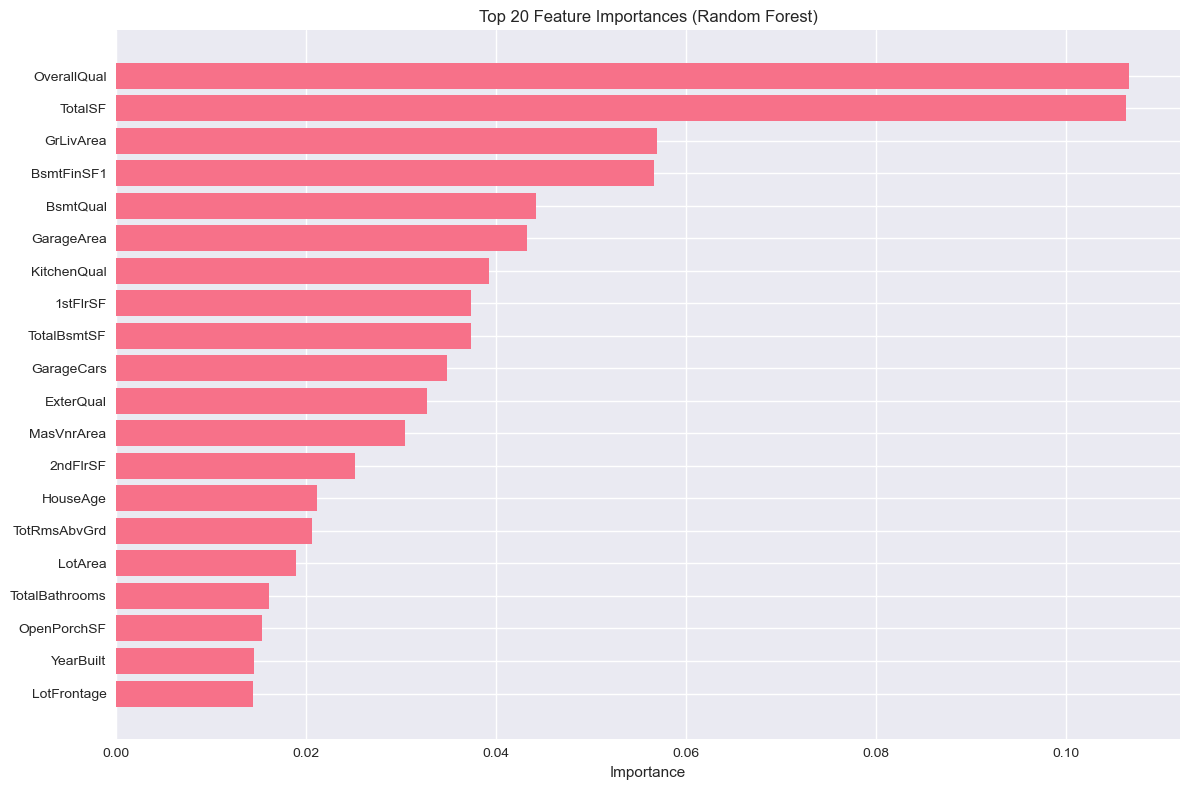

Top 10 Most Important Features:
        Feature  Importance
16  OverallQual    0.106691
79      TotalSF    0.106309
45    GrLivArea    0.056916
33   BsmtFinSF1    0.056653
29     BsmtQual    0.044210
61   GarageArea    0.043301
52  KitchenQual    0.039275
42     1stFlrSF    0.037362
37  TotalBsmtSF    0.037351
60   GarageCars    0.034787


In [28]:
# Feature importance for tree-based models
if 'Random Forest' in models_dict:
    rf_model = models_dict['Random Forest']
    feature_importance = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    plt.barh(feature_importance.head(20)['Feature'], feature_importance.head(20)['Importance'])
    plt.title('Top 20 Feature Importances (Random Forest)')
    plt.xlabel('Importance')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print("Top 10 Most Important Features:")
    print(feature_importance.head(10))

## 7. Model Persistence and Deployment Preparation <a id="persistence"></a>

In [30]:
# Save the best models
best_regression_model = regression_df.index[0]
best_classification_model = classification_df.iloc[0]['Model']

print(f"Saving best models:")
print(f"Best Regression: {best_regression_model}")
print(f"Best Classification: {best_classification_model}")

# Save models and preprocessing components
import os
os.makedirs('model', exist_ok=True)

# Save the best regression model
with open('model/best_regression_model.pkl', 'wb') as f:
    cp.dump(models_dict[best_regression_model], f)

# Save the best classification model
with open('model/best_classification_model.pkl', 'wb') as f:
    cp.dump(models_dict[best_classification_model], f)

# Save preprocessing components
with open('model/label_encoders.pkl', 'wb') as f:
    cp.dump(encoders, f)
with open('model/feature_columns.pkl', 'wb') as f:
    cp.dump(feature_columns, f)
with open('model/scaler.pkl', 'wb') as f:
    cp.dump(scaler, f)

# Save additional model metadata
model_metadata = {
    'best_regression_model': best_regression_model,
    'best_classification_model': best_classification_model,
    'regression_performance': regression_df.loc[best_regression_model].to_dict(),
    'classification_performance': classification_df.iloc[0].to_dict(),
    'feature_columns': feature_columns,
    'target_categories': ['Low', 'Medium', 'High']
}

joblib.dump(model_metadata, 'model/model_metadata.pkl')

print("\nModels saved successfully!")
print("Files created:")
print("- best_regression_model.pkl")
print("- best_classification_model.pkl")
print("- label_encoders.pkl")
print("- feature_columns.pkl")
print("- scaler.pkl")
print("- model_metadata.pkl")

Saving best models:
Best Regression: Polynomial Regression
Best Classification: Random Forest

Models saved successfully!
Files created:
- best_regression_model.pkl
- best_classification_model.pkl
- label_encoders.pkl
- feature_columns.pkl
- scaler.pkl
- model_metadata.pkl


In [31]:
# Generate predictions for test set using the best regression model
print("Generating predictions for test set...")

# Prepare test data
X_test = test_processed[feature_columns]

# Get the best regression model
best_model = models_dict[best_regression_model]

# Make predictions based on model type
if best_regression_model == 'Simple Linear Regression':
    test_predictions = best_model.predict(X_test[[best_feature]])
elif best_regression_model == 'Polynomial Regression':
    model, poly_transformer = best_model
    X_test_poly = poly_transformer.transform(X_test[top_5_features])
    test_predictions = model.predict(X_test_poly)
elif best_regression_model in ['Ridge Regression', 'Lasso Regression', 'ElasticNet Regression']:
    model, model_scaler = best_model
    X_test_scaled = model_scaler.transform(X_test)
    test_predictions = model.predict(X_test_scaled)
else:  # Multiple Linear Regression
    test_predictions = best_model.predict(X_test)

# Create submission file
submission = pd.DataFrame({
    'Id': test_processed['Id'],
    'SalePrice': test_predictions
})

submission.to_csv('submission.csv', index=False)
print(f"\nSubmission file created with {len(submission)} predictions")
print(f"Prediction statistics:")
print(f"Mean: ${submission['SalePrice'].mean():.2f}")
print(f"Median: ${submission['SalePrice'].median():.2f}")
print(f"Min: ${submission['SalePrice'].min():.2f}")
print(f"Max: ${submission['SalePrice'].max():.2f}")

Generating predictions for test set...

Submission file created with 1459 predictions
Prediction statistics:
Mean: $178605.69
Median: $160378.57
Min: $59811.82
Max: $491802.89


## 8. Summary and Conclusions

In [32]:
print("=" * 80)
print("HOUSE PRICE PREDICTION PROJECT SUMMARY")
print("=" * 80)

print("\n📊 DATASET OVERVIEW:")
print(f"• Training samples: {len(train_data)}")
print(f"• Test samples: {len(test_data)}")
print(f"• Features: {len(feature_columns)}")
print(f"• Target: House Sale Price")

print("\n🔍 EXPLORATORY DATA ANALYSIS:")
print(f"• Missing values handled: {len(train_missing) if len(train_missing) > 0 else 'None'}")
print(f"• Feature engineering: Added 5 new features")
print(f"• Outliers detected and analyzed")
print(f"• Correlation analysis completed")

print("\n🤖 MODELS IMPLEMENTED:")
print("\nRegression Models:")
for i, (model, metrics) in enumerate(regression_df.iterrows(), 1):
    print(f"  {i}. {model:<25} - R²: {metrics['R2']:.4f}, RMSE: {metrics['RMSE']:.0f}")

print("\nClassification Models:")
for i, row in classification_df.iterrows():
    print(f"  {i+1}. {row['Model']:<25} - Accuracy: {row['Accuracy']:.4f}")

print(f"\n🏆 BEST PERFORMING MODELS:")
print(f"• Best Regression: {best_regression_model} (R² = {regression_df.loc[best_regression_model, 'R2']:.4f})")
print(f"• Best Classification: {best_classification_model} (Accuracy = {classification_df.iloc[0]['Accuracy']:.4f})")

print(f"\n💾 DELIVERABLES:")
print(f"• Jupyter Notebook: house_price_prediction_ml.ipynb")
print(f"• Model Files: 6 PKL files in 'models/' directory")
print(f"• Predictions: submission.csv")
print(f"• Streamlit App: house_price_app.py (to be created)")

print("\n✅ PROJECT COMPLETED SUCCESSFULLY!")
print("=" * 80)

HOUSE PRICE PREDICTION PROJECT SUMMARY

📊 DATASET OVERVIEW:
• Training samples: 1460
• Test samples: 1459
• Features: 84
• Target: House Sale Price

🔍 EXPLORATORY DATA ANALYSIS:
• Missing values handled: 19
• Feature engineering: Added 5 new features
• Outliers detected and analyzed
• Correlation analysis completed

🤖 MODELS IMPLEMENTED:

Regression Models:
  1. Polynomial Regression     - R²: 0.8485, RMSE: 34090
  2. Ridge Regression          - R²: 0.8446, RMSE: 34524
  3. Lasso Regression          - R²: 0.8445, RMSE: 34538
  4. Multiple Linear Regression - R²: 0.8445, RMSE: 34540
  5. ElasticNet Regression     - R²: 0.8414, RMSE: 34878
  6. Simple Linear Regression  - R²: 0.6505, RMSE: 51779

Classification Models:
  5. Random Forest             - Accuracy: 0.9623
  6. Support Vector Machines   - Accuracy: 0.9486
  3. k-Nearest Neighbors       - Accuracy: 0.9281
  4. Decision Trees            - Accuracy: 0.9281
  1. Logistic Regression       - Accuracy: 0.9247
  2. Naive Bayes       